# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from tasks.base_task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

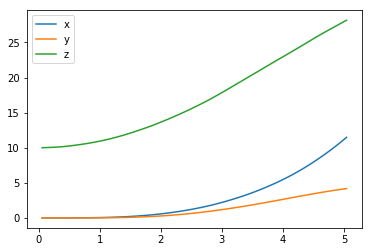

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

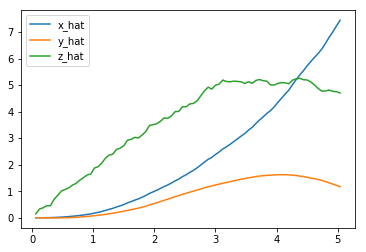

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

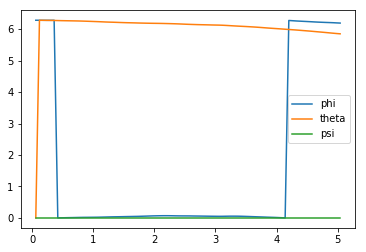

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

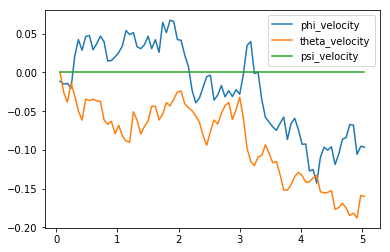

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

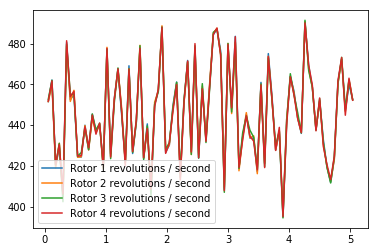

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 11.48475295   4.18048085  28.16893242   6.19298677   5.85143461   0.        ]
[ 7.44501869  1.17013832  4.70617747]
[-0.09640922 -0.15992999  0.        ]


Please also run the following code to show the quadcopter path in 3D.

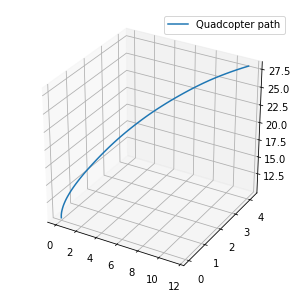

In [9]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
x = results['x']
y = results['y']
z = results['z']
ax.plot(x, y, z, label='Quadcopter path')
ax.legend()

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from tasks.base_task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.182 (best =  -0.072), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [11]:
import sys
import pandas as pd
from tasks.task_1 import Task
from agents.agent import DDPG

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 20., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
rewards_list = []
data = {}

# Setup
target_pos = np.array([0., 0., 50.])
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)
agent = DDPG(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
num_episodes = 200
best_score = -10000

# Run the simulation num_episodes times, and save the results.
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode()
    score = 0

    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)        
        agent.step(action, reward, next_state, done)
        score += reward
        state = next_state
        data[i_episode] = {'Episode': i_episode, 'Reward':score,'Action':action,'Position_x':task.sim.pose[0],'Position_y':task.sim.pose[1],'Position_z':task.sim.pose[2]}
        
        if i_episode == num_episodes:                       
            with open(file_output, 'w') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerow(labels)
                to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
                for j in range(len(labels)):
                    results[labels[j]].append(to_write[j])
                writer.writerow(to_write)
            
        if done:
            best_score = max(score, best_score)
            print("\rEpisode = {:4d}, score = {:4.2f}, best score = {:4.2f}".format(i_episode, score, best_score), end="")
            rewards_list.append(score)
            break
            
    sys.stdout.flush()

Using TensorFlow backend.


Episode =  200, score = 246.46, best score = 253.32

In [12]:
data = pd.DataFrame.from_dict(data=data, orient='index')

## Visualize How Quadcopter Actions evoled During the Simulation

Run the code cell below to visualize how the position of the quadcopter evolved in the LAST simulation.

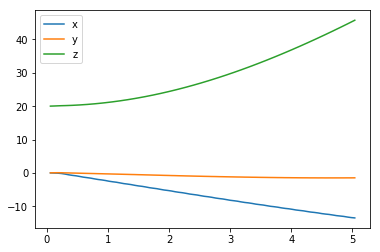

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter in the LAST simulation..

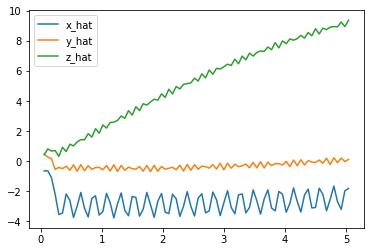

In [14]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes) in the LAST simulation,

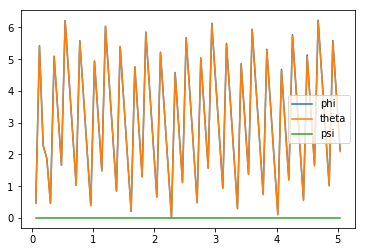

In [15]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles in the LAST simulation.

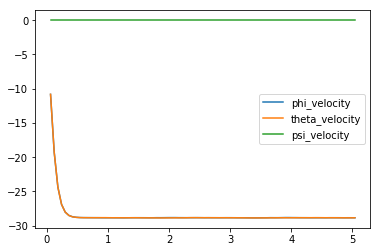

In [16]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions in the LAST simulation..

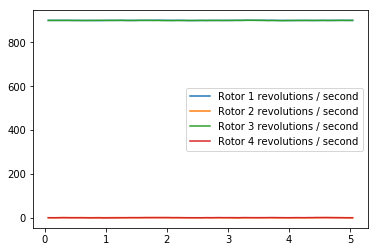

In [17]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [18]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-13.50446962  -1.48331703  45.77187399   2.12797563   2.0908293    0.        ]
[-1.80781684  0.12476273  9.36045028]
[-28.84020395 -28.84242962   0.        ]


Please also run the following code to show the quadcopter path in 3D.

(0, 100)

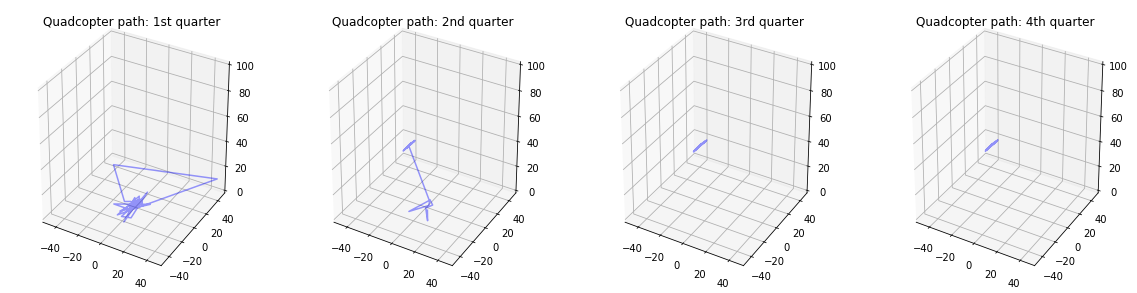

In [19]:
fig = plt.figure(figsize=(20,5))

x_lim = [-50,50]
y_lim = [-50,50]
z_lim = [0,100]

#1st
episode_start = 0
episode_end = num_episodes/4
ax1 = fig.add_subplot(1, 4, 1, projection='3d')
x = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_x']
y = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_y']
z = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_z']
ax1.plot3D(x, y, z, alpha=0.4, color='blue')
ax1.set_title("Quadcopter path: 1st quarter")
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_zlim(z_lim)


#2nd
episode_start = 1+num_episodes/4
episode_end = num_episodes/2
ax2 = fig.add_subplot(1, 4, 2, projection='3d')
x = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_x']
y = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_y']
z = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_z']
ax2.plot3D(x, y, z, alpha=0.4, color='blue')
ax2.set_title("Quadcopter path: 2nd quarter")
ax2.set_xlim(x_lim)
ax2.set_ylim(y_lim)
ax2.set_zlim(z_lim)


#3rd
episode_start = 1+num_episodes/2
episode_end = num_episodes/4*3
ax3 = fig.add_subplot(1, 4, 3, projection='3d')
x = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_x']
y = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_y']
z = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_z']
ax3.plot3D(x, y, z, alpha=0.4, color='blue')
ax3.set_title("Quadcopter path: 3rd quarter")
ax3.set_xlim(x_lim)
ax3.set_ylim(y_lim)
ax3.set_zlim(z_lim)


#4th
episode_start = 1+num_episodes/4*3
episode_end = num_episodes
ax4 = fig.add_subplot(1, 4, 4, projection='3d')
x = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_x']
y = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_y']
z = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_z']
ax4.plot3D(x, y, z, alpha=0.4, color='blue')
ax4.set_title("Quadcopter path: 4th quarter")
ax4.set_xlim(x_lim)
ax4.set_ylim(y_lim)
ax4.set_zlim(z_lim)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

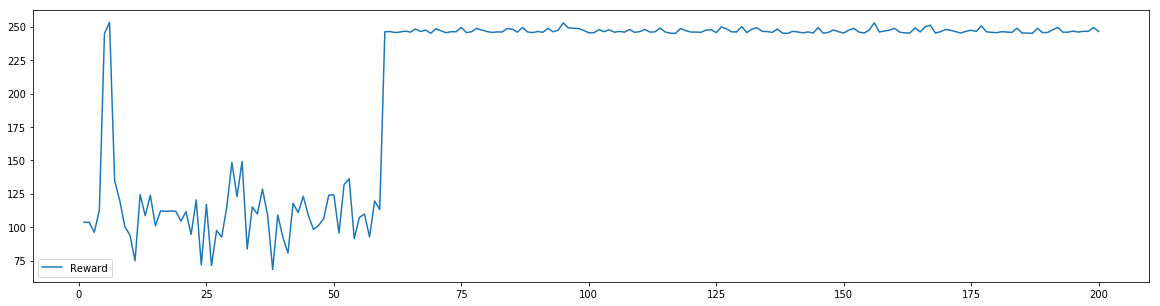

In [20]:
plt.figure(figsize=(20,5))
plt.plot(data['Episode'], data['Reward'])
plt.legend()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

- Task
>- **Take-off**: The first part is to make the quadcopter fly vertically while minimizing its changes on the horizontal surface. In order to accomplish the task, the target position of (0,0,20) is set to be directly above the initial position of the quadcopter, (0,0,50).
>- **Hover-over**: After the quadcopter reaches the desired height, the second part of the task is to make it loiter and stay as close as to the target position.
- Score
>- Reward
>>- **1**: The constant number is to keep the reward score above a certain threshold and to encourage the quadcopter to continue flying.
>>- **+0.03**: To award the agent while being close to the target position within a twenty-five centimeters distance from any of the coordinates. To guide the agent to fly along with the correct direction.
>- Penalty
>>- **-0.001*Distance from the target**: To punish the agent for being far from the target position.

- Function


    def get_reward(self):   
    
        reward = 1.-.001*(abs(self.sim.pose[:3] - self.target_pos)).sum()          
        for dimension in range (2):
            if (abs(self.sim.pose[dimension] - self.target_pos[dimension])) < 0.25:
                reward += .03
        
        return reward

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

- Algorithm
>- The selected agent is Deep Deterministic Policy Gradients (**DDPG**) based on the suggestion from Udacity. The off-policy, model-free algorithm does support learning in continuous action space, such as to train a quadcopter how to fly.
>- The actor-critic method is also adopted here to enhance the learning process.
- Hyperparameters
>- I have tried to tune the hyperparameters below but cannot achieve a better result. Therefore, the values are not altered and remain the same as in the example code.
>- Noice process
>>- Mu = 0
>>- Theta = 0.15
>>- Sigma = 0.2
>- Algorithm parameters
>>- Gamma (discount factor) = 0.99
>>- Tau (trajectory update parameter) = 0.01
- Neural network architecture
>- Actor
>>- Hidden layer
>>>- Three dense layers with 32, 64, and 32 units
>>>- relu function as activation for all three layers
>>- Output layer
>>>- sigmoid function as activation
>>>- Scaled to the proper range between 0 and 1 using a lambda layer
>>>- With Adam optimizer
>- Critic
>>- Input: States
>>>- Two hidden layers with 32 and 64 units
>>>- relu function as activation for both layers
>>- Input: Actions
>>>- Two hidden layers with 32 and 64 units
>>>- Relu function as activation for both layers
>>- Combine the two
>>>- State and action pathways are connected to one output as Q values
>>>- relu function as activation
>>- Output layer
>>>- With Adam optimizer
>>>- With build-in loss function (mse)

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- According to the episode rewards plot, the task is not especially hard. The agent even scored 250 at the first couple of runs; however, it tried out other solutions and fell back to low scores due to the algorithm. Luckily, it did not take too long for it to remember the good results. The agent achieved its best score after 50 to 75 episodes and remained its optimized performance since then.
- The aha moment happened at 50 to 75 episodes. The score made a big jump from around 100 to 250 and never went back.
- The final performance is rather steady, and the last 10 scores are very close to each other. An average of 250 was achieved. As a matter of fact, since 50 to 75 episodes, the agent already learned the task pretty well and performed consistent results during the following runs.  

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

**Hardest Part**

The hardest part is definitely to define a reward function. I tried to come up with a workable one by playing with various possible combinations of rewards and penalties, including velocity, angular velocity, angles, distance from the target position,  direction of the flying path, etc. To determine the structure itself was difficult enough, not to mention the weights; any small tweak could lead to a totally different result. To balance the rewards with penalties was especially challenging, and the quadcopter either refused to take-off or flew way too high in most of the try.

After several attempts, I noticed a drastic change in weights would give me a satisfying performance. A significant increase in the weight of rewards was added, and the updated function then taught the agent pretty efficiently. Around learning for 50 to 75 runs, the agent was able to fly vertically and to loiter after reaching the target position.


**Interesting Finds**

According to the 3D-path plot, the quadcopter seems to do a decent job and complete the task within a comparatively short period. However, I notice that it not only flew vertically but also horizontally along the negative x-direction in its last simulation. This is undesirable and leaves some space for improvement. 

By reviewing the velocity plot, I also notice that the value of z-hat kept on increasing within the runtime, and this would not be the case in the real world. Since the second part of the task is to loiter when reaching the target, the drone should slow-down when it is getting close to the destination and stop entirely when it reaches. I assume this is because the environment does not take the inertia and the limit of motors into consideration.

The plots related to Euler angles show that the values of phi and psi and their velocities remain 0 in the last simulation. By looking at the plot of agent’s choice, I also realize that only half of the rotors were used to fulfill the task. These finds are interesting to me.

## Compare the Two Reward Functions and their Performances
**Introduction**

In the next section, I will re-run the algorithm but with another reward function shown as the following:
>reward = 1.-.003*(abs(self.sim.pose[:3] - self.target_pos)).sum() 

The quadcopter actions will be visualized, and the episode rewards will be plotted for a better comparison. Please understand that only the reward function will be changed, the learning algorithm, hyperparameters, and neural network architecture will remain the same.


**Comparison**
- Quadcopter Action
>- **Position**: Quadcopters in both functions flew vertically; however, the one in the 2nd function did not stop rising and start loitering when it reached the target position but kept on going up. On the other hand, the horizontal displacement in the 1st function was more significant than the 2nd, which is less desirable.
>- **Velocity**: The velocity along z-coordinate decreased during the second half runtime in the 2nd function, which is more reasonable in the real world. However, to fly the quadcopter down after it exceeded the z position of the target, the velocity needed to go even lower and to be negative.
>- **Euler Angle & Velocity**: In the 1st function, phi and psi angles/velocities remained unchanged. Only the psi angle/velocity stayed as zero in the second function.
>- **Choice of Action**: Both quadcopters used only half of the rotors during the runtime.
- Quadcopter Path
> The 1st function led to a much more steady result, in which the quadcopter stayed close to the position after reaching. The learning outcome was somewhat acceptable for the 2nd function. The quadcopter learned how to take-off successfully; nonetheless, it did not perform as good in loitering at the correct position. The path also indicated the 2nd function as the less stable solution. 
- Reward Plot
> Quadcopter with the 2nd reward function learned very quickly; after 25 to 30 runs, it found out its approach to earn more scores. However, there were more noises during the training process, which led to a less stable performance. Very low scores even occurred during the last couple of runs. On the other hand, though it took a longer time for the quadcopter with the 1st reward function to learn, the result is much more reliable, comparatively.

In [29]:
import sys
import pandas as pd
import numpy as np
from agents.agent import DDPG

# Change reward function
from tasks.task_3 import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 20., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data_compare.txt'
rewards_list = []
data = {}

# Setup
target_pos = np.array([0., 0., 50.])
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)
agent = DDPG(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
num_episodes = 200
best_score = -10000

# Run the simulation num_episodes times, and save the results.
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode()
    score = 0

    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)        
        agent.step(action, reward, next_state, done)
        score += reward
        state = next_state
        data[i_episode] = {'Episode': i_episode, 'Reward':score,'Action':action,'Position_x':task.sim.pose[0],'Position_y':task.sim.pose[1],'Position_z':task.sim.pose[2]}
        
        if i_episode == num_episodes:                       
            with open(file_output, 'w') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerow(labels)
                to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
                for j in range(len(labels)):
                    results[labels[j]].append(to_write[j])
                writer.writerow(to_write)
            
        if done:
            best_score = max(score, best_score)
            print("\rEpisode = {:4d}, score = {:4.2f}, best score = {:4.2f}".format(i_episode, score, best_score), end="")
            rewards_list.append(score)
            break
            
    sys.stdout.flush()

Episode =  200, score = 235.55, best score = 238.36

In [30]:
data = pd.DataFrame.from_dict(data=data, orient='index')

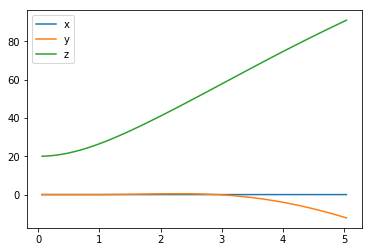

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

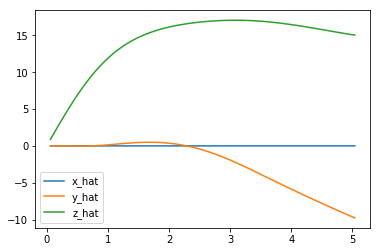

In [32]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

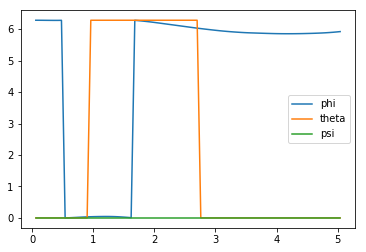

In [33]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

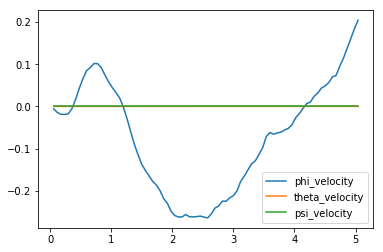

In [34]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

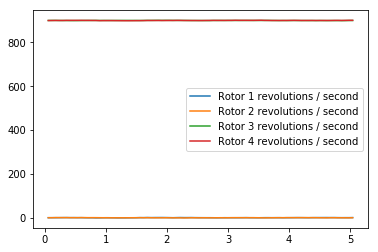

In [35]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

In [36]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -3.26731454e-04  -1.21883357e+01   9.10814878e+01   5.92223332e+00
   1.13952434e-04   0.00000000e+00]
[ -9.52573739e-04  -9.78166137e+00   1.50468222e+01]
[  2.04527622e-01   6.62802141e-05   0.00000000e+00]


(0, 100)

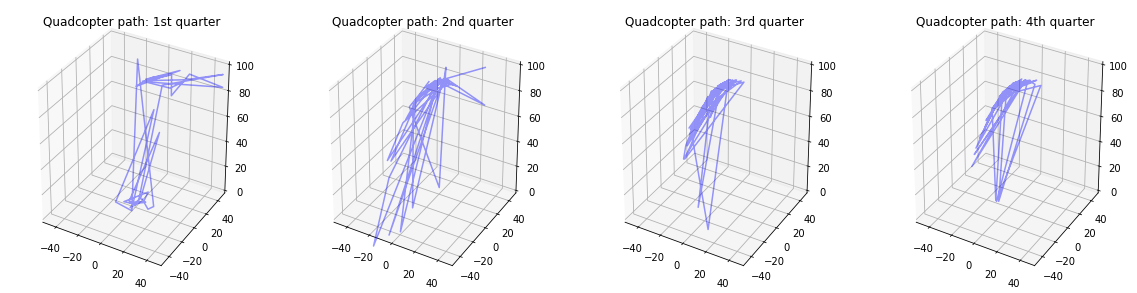

In [37]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,5))

x_lim = [-50,50]
y_lim = [-50,50]
z_lim = [0,100]

#1st
episode_start = 0
episode_end = num_episodes/4
ax1 = fig.add_subplot(1, 4, 1, projection='3d')
x = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_x']
y = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_y']
z = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_z']
ax1.plot3D(x, y, z, alpha=0.4, color='blue')
ax1.set_title("Quadcopter path: 1st quarter")
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_zlim(z_lim)


#2nd
episode_start = 1+num_episodes/4
episode_end = num_episodes/2
ax2 = fig.add_subplot(1, 4, 2, projection='3d')
x = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_x']
y = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_y']
z = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_z']
ax2.plot3D(x, y, z, alpha=0.4, color='blue')
ax2.set_title("Quadcopter path: 2nd quarter")
ax2.set_xlim(x_lim)
ax2.set_ylim(y_lim)
ax2.set_zlim(z_lim)


#3rd
episode_start = 1+num_episodes/2
episode_end = num_episodes/4*3
ax3 = fig.add_subplot(1, 4, 3, projection='3d')
x = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_x']
y = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_y']
z = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_z']
ax3.plot3D(x, y, z, alpha=0.4, color='blue')
ax3.set_title("Quadcopter path: 3rd quarter")
ax3.set_xlim(x_lim)
ax3.set_ylim(y_lim)
ax3.set_zlim(z_lim)


#4th
episode_start = 1+num_episodes/4*3
episode_end = num_episodes
ax4 = fig.add_subplot(1, 4, 4, projection='3d')
x = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_x']
y = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_y']
z = data[(data['Episode']>episode_start) & (data['Episode']<=episode_end)]['Position_z']
ax4.plot3D(x, y, z, alpha=0.4, color='blue')
ax4.set_title("Quadcopter path: 4th quarter")
ax4.set_xlim(x_lim)
ax4.set_ylim(y_lim)
ax4.set_zlim(z_lim)

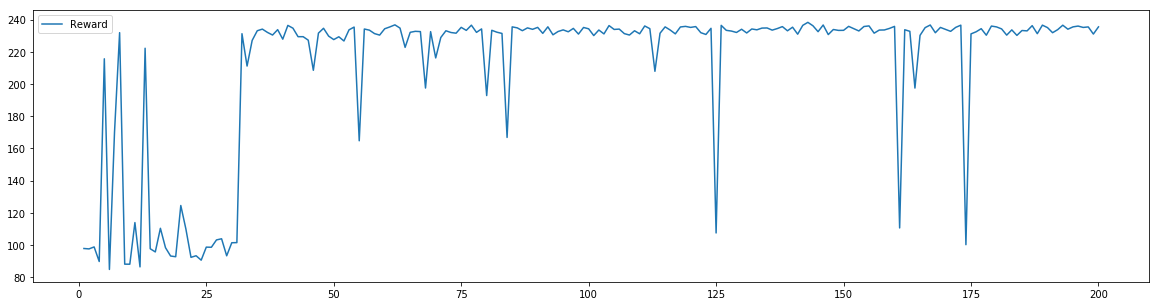

In [38]:
plt.figure(figsize=(20,5))
plt.plot(data['Episode'], data['Reward'])
plt.legend()